In [56]:
# Importing Data Manipulation Libraries
import numpy as np
import pandas as pd

# Importing Data Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Flter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging Library
import logging
logging.basicConfig(level=logging.INFO,
                    format= '%(asctime)s - %(levelname)s - %(message)s',
                    filemode= "w",
                    filename= 'model.log',force=True)


# Multicolinearity test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA


In [57]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [58]:
# Loading Dataset

url  = "https://raw.githubusercontent.com/anirudhajohare19/CodeB_Internship/refs/heads/main/dataset_phishing.csv"
df = pd.read_csv(url)


df.sample(frac= 1) # Shuffling the dataset


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
1841,http://mickey.disney.com/,25,17,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,2,0,6,6,0,6,6,0,6.000000,6.000000,0.000000,0,1,0,0,0,0,199,0.341709,0.658291,0,13,0,0.053435,0,0.000000,0,1,21.621622,0,0.000000,100.000000,0,0,0,26.829268,0,0,0,0,1,0,971,11083,3822,0,0,6,legitimate
5258,http://www.ilovefreesoftware.com/21/windows-10...,81,25,0,3,5,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.074074,0.000000,0,0,0,0,0,3,1,0,0,0,1,0,11,4,2,3,2,17,17,8,5.454545,10.000000,4.444444,0,0,0,0,0,0,38,0.500000,0.500000,0,1,0,0.210526,0,0.000000,0,1,58.823529,0,0.000000,100.000000,0,0,1,53.846154,0,0,0,1,0,0,654,4093,52436,0,0,4,legitimate
1162,https://greatist.com/eat/protein-pancake-recipes,48,12,0,1,2,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,1,0,0,1,0,0,0,5,0,3,8,3,8,8,7,6.400000,8.000000,6.000000,0,0,0,0,0,0,119,0.571429,0.428571,0,0,0,0.196078,0,0.156863,0,1,8.695652,0,80.000000,20.000000,0,0,0,0.000000,0,0,0,1,0,0,2320,5349,10753,0,0,5,legitimate
4691,https://jbouy-my.sharepoint.com/:b:/g/personal...,137,23,0,2,2,0,1,0,0,1,3,0,0,7,0,3,0,0,0,0,0,1,0,0,0,0.043796,0.000000,0,0,1,0,0,2,1,0,1,0,1,0,14,3,1,2,1,25,10,25,7.857143,5.666667,8.454545,0,0,0,0,0,0,26,0.115385,0.884615,0,0,0,0.000000,0,0.086957,0,1,7.692308,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,0,0,381,8019,0,0,1,4,phishing
7235,https://muggetlogin.oa.r.appspot.com/home.html,46,28,0,5,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,3,0,0,1,0,0,0,6,2,1,1,4,11,11,4,4.833333,5.250000,4.000000,1,0,0,0,0,0,83,0.469880,0.530120,0,2,0,0.363636,0,0.045455,1,1,0.000000,0,33.333333,66.666667,0,0,0,56.923077,0,0,0,1,1,0,231,5613,0,0,1,5,phishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9597,http://mshsapbiology.weebly.com/uploads/1/1/6/...,93,24,1,3,0,0,0,0,0,0,5,0,0,9,0,1,0,0,0,0,0,0,0,0,1,0.129032,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,15,6,1,6,1,13,13,8,4.533333,9.500000,3.769231,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,1,1,1,0,246,5232,0,0,0,7,legitimate
9599,http://user7770001255.el.r.appspot.com/jim@the...,64,31,1,5,0,1,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,1,0,0,1,0.156250,0.322581,0,0,1,0,0,3,0,0,1,0,0,0,7,8,1,1,3,17,14,17,6.714286,6.000000,7.666667,0,0,0,0,0,0,21,0.190476,0.809524,0,1,0,0.294118,0,0.000000,0,1,0.000000,0,20.000000,80.000000,0,0,0,25.000000,0,0,0,1,1,0,216,5627,0,0,1,5,phishing
2382,http://www.arrowcase.com/wp-content/plugins/ba...,68,17

In [59]:
# Check for missing values
df.isnull().sum()

url                           0
length_url                    0
length_hostname               0
ip                            0
nb_dots                       0
nb_hyphens                    0
nb_at                         0
nb_qm                         0
nb_and                        0
nb_or                         0
nb_eq                         0
nb_underscore                 0
nb_tilde                      0
nb_percent                    0
nb_slash                      0
nb_star                       0
nb_colon                      0
nb_comma                      0
nb_semicolumn                 0
nb_dollar                     0
nb_space                      0
nb_www                        0
nb_com                        0
nb_dslash                     0
http_in_path                  0
https_token                   0
ratio_digits_url              0
ratio_digits_host             0
punycode                      0
port                          0
tld_in_path                   0
tld_in_s

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [61]:
# Check class distribution
print("\nClass distribution:")
print(df['status'].value_counts())


Class distribution:
status
legitimate    5715
phishing      5715
Name: count, dtype: int64


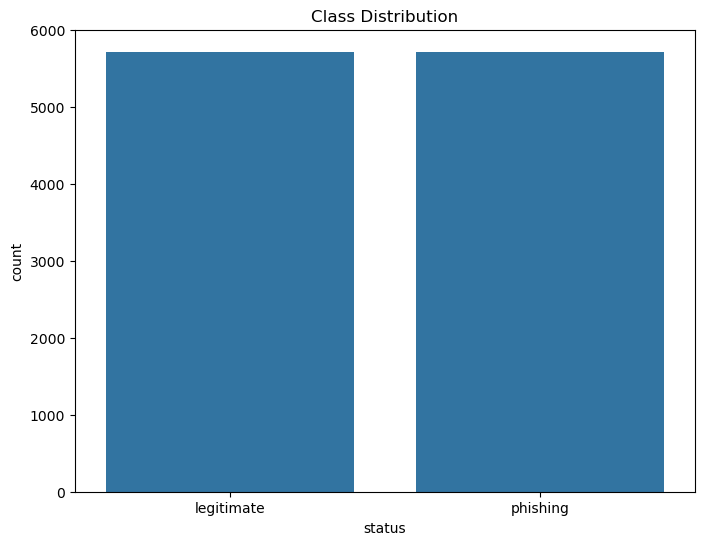

In [62]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=df)
plt.title('Class Distribution')
plt.show()

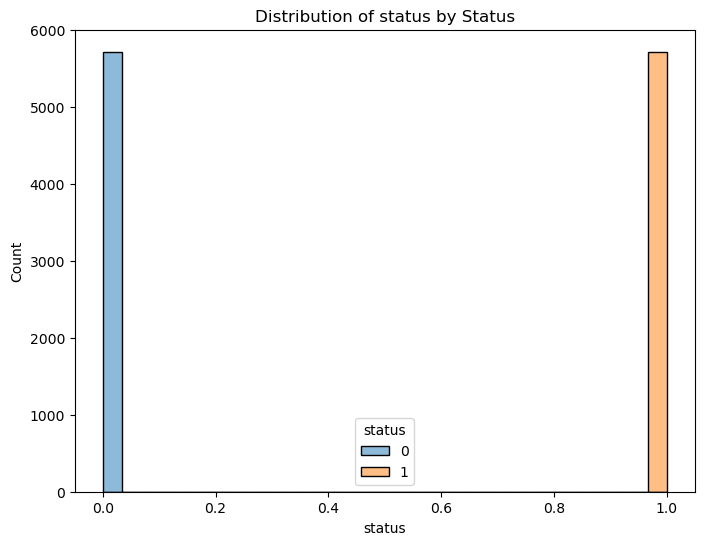

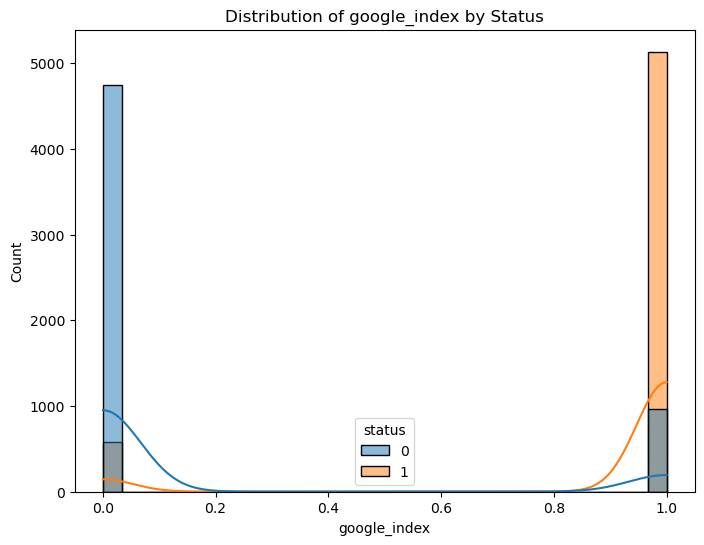

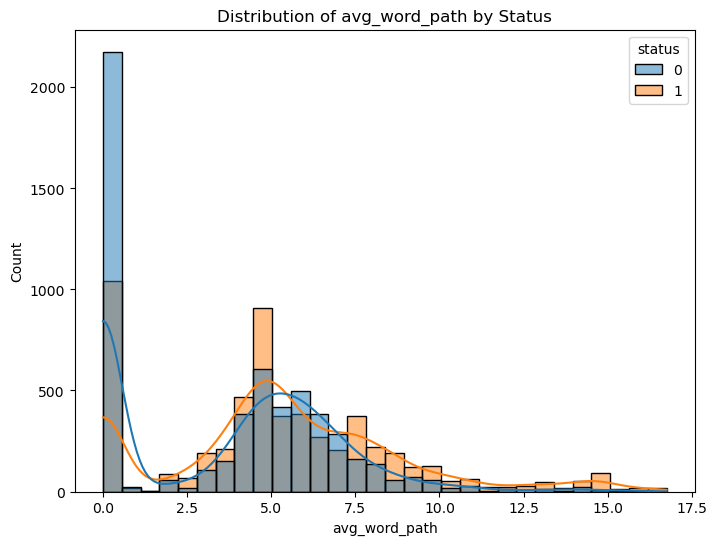

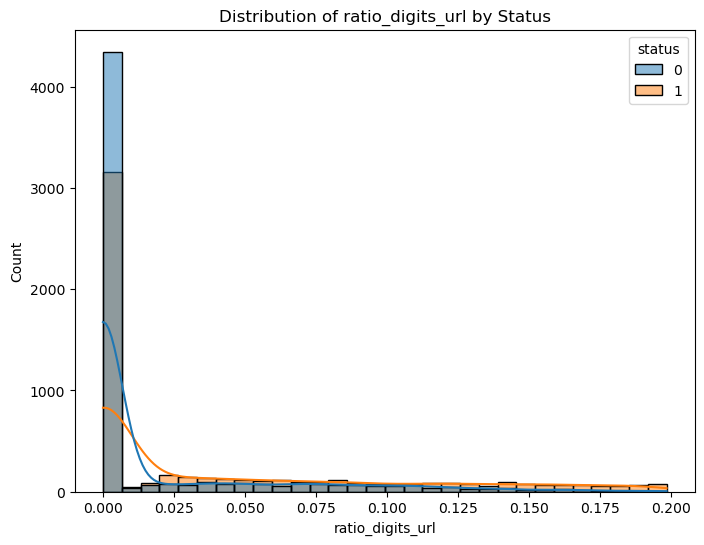

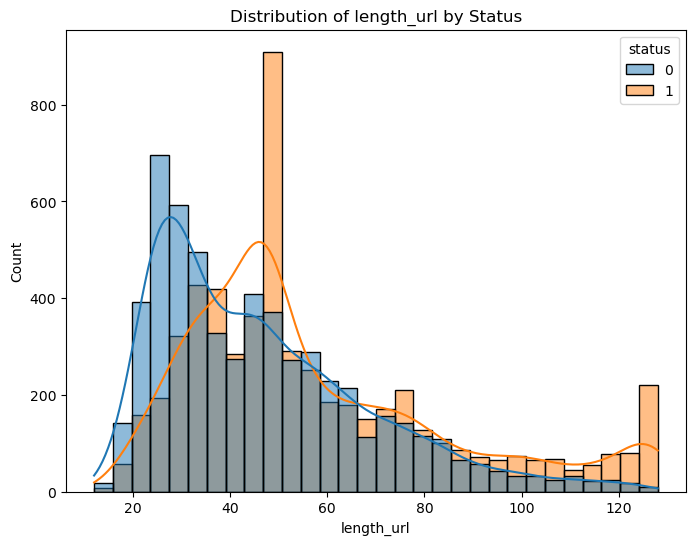

In [77]:
# Plot distributions of top features
top_features = status_corr.index[:5]
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='status', kde=True, bins=30)
    plt.title(f'Distribution of {feature} by Status')
    plt.show()

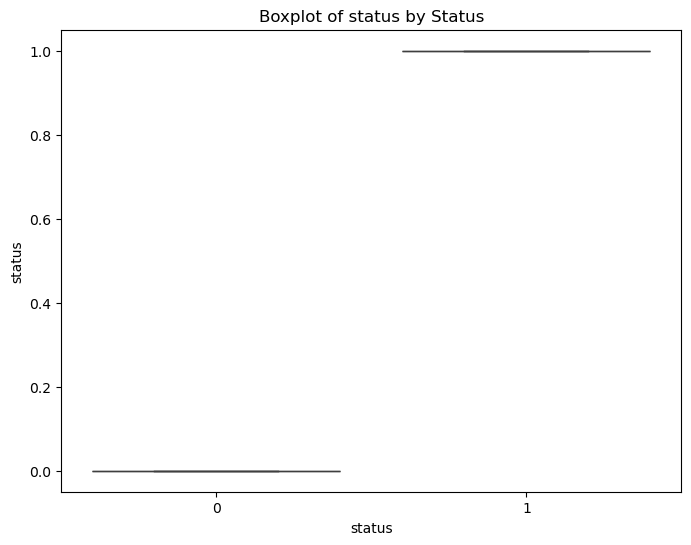

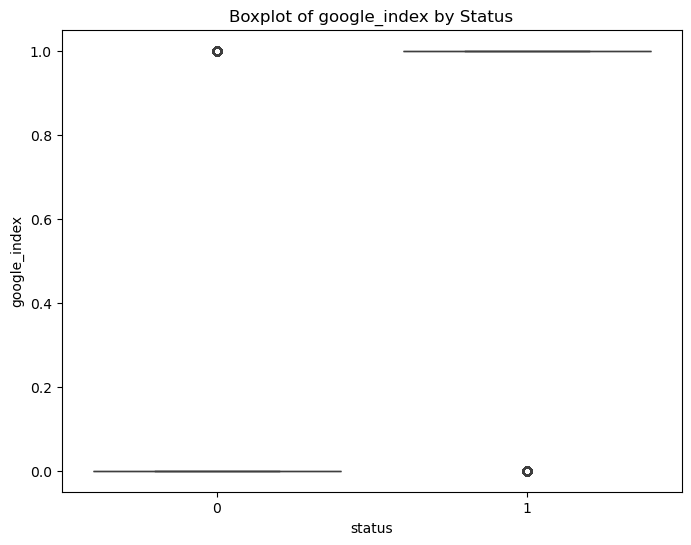

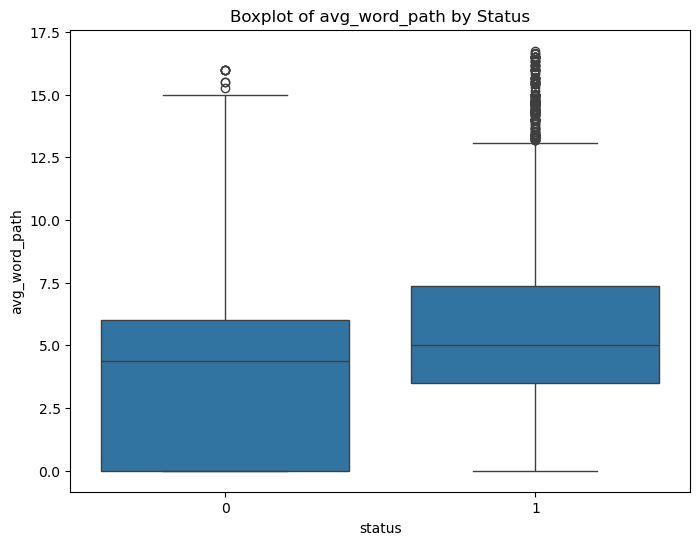

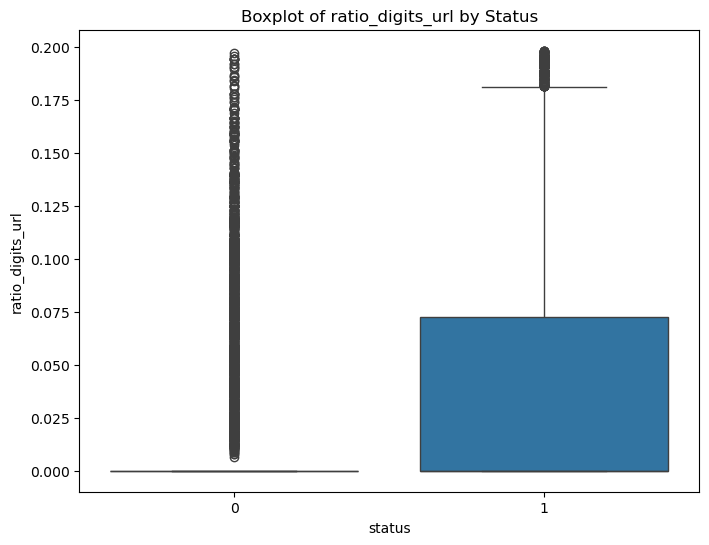

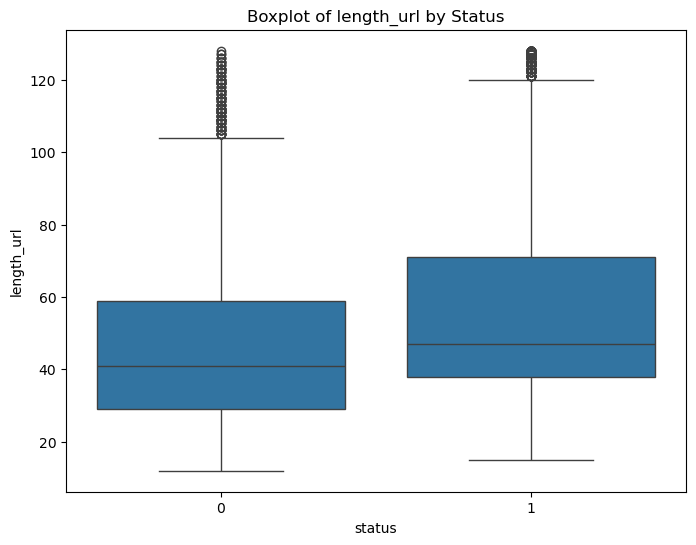

In [78]:
# Boxplots for top features to check outliers
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='status', y=feature)
    plt.title(f'Boxplot of {feature} by Status')
    plt.show()

In [63]:
from collections import OrderedDict

stats = []

# Descriptive statistics
for col in df.columns:
    if df[col].dtype != 'object':
        numerical_stats = OrderedDict({
            'Feature': col,
            'Minimum': df[col].min(),
            'Maximum': df[col].max(),
            'Mean': df[col].mean(),
            'Mode': df[col].mode()[0] if not df[col].mode().empty else None,
            '25%': df[col].quantile(0.25),
            '75%': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Standard Deviation': df[col].std(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()
        })
        stats.append(numerical_stats)

# Convert to DataFrame
report = pd.DataFrame(stats)

# Outlier Identification :
outlier_label = []
for col in report['Feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

# Checking Report
report

,Feature,Minimum,Maximum,Mean,Mode,25%,75%,IQR,Standard Deviation,Skewness,Kurtosis,Outlier Comment
0,length_url,12.0,1.641000e+03,61.126684,26.0,33.000000,71.000000,38.000000,5.529732e+01,8.085190,144.196391,Has Outliers
1,length_hostname,4.0,2.140000e+02,21.090289,16.0,15.000000,24.000000,9.000000,1.077717e+01,5.160078,69.829931,Has Outliers
2,ip,0.0,1.000000e+00,0.150569,0.0,0.000000,0.000000,0.000000,3.576436e-01,1.954418,1.820067,Has Outliers
3,nb_dots,1.0,2.400000e+01,2.480752,2.0,2.000000,3.000000,1.000000,1.369686e+00,5.718117,66.155843,Has Outliers
4,nb_hyphens,0.0,4.300000e+01,0.997550,0.0,0.000000,1.000000,1.000000,2.087087e+00,4.695239,40.696686,Has Outliers
5,nb_at,0.0,4.000000e+00,0.022222,0.0,0.000000,0.000000,0.000000,1.554999e-01,8.272893,95.457038,Has Outliers
6,nb_qm,0.0,3.000000e+00,0.141207,0.0,0.000000,0.000000,0.000000,3.644558e-01,2.488737,6.060591,Has Outliers
7,nb_and,0.0,1.900000e+01,0.162292,0.0,0.000000,0.000000,0.000000,8.213374e-01,9.725295,139.140959,Has Outliers
8,nb_or,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,No Outliers
9,nb_eq,0.0,1.900000e+01,0.293176,0.0,0.000000,0.000000,0.000000,9.983172e-01,6.530036,70.909580,Has Outliers


In [64]:
# Using Lebel Encoding
from sklearn.preprocessing import LabelEncoder

df['url']=LabelEncoder().fit_transform(df['url'])
df['status']=LabelEncoder().fit_transform(df['status'])
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,4501,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.00,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.000000,0,0,0,0,1,0,45,-1,0,1,1,4,0
1,3063,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.00,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.000000,0,0,0,1,0,0,77,5767,0,0,1,2,1
2,8984,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.000000,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.40,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.000000,0,0,0,1,0,0,14,4004,5828815,0,1,0,1
3,2778,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.00,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.500000,0,0,0,1,0,0,62,-1,107721,0,0,3,0
4,5261,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.00,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.000000,0,0,0,0,1,0,224,8175,8725,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,4876,45,17,0,2,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,4,4,3,3,8,11,9,11,7.750000,6.00,9.500000,0,0,0,0,0,0,199,0.884422,0.115578,0,0,0,0.043478,0,0.173913,0,1,80.000000,0,21.052632,78.947368,0,0,0,0.000000,0,0,0,0,0,0,448,5396,3980,0,0,6,0
11426,4285,84,18,0,5,0,1,1,0,0,1,0,0,1,5,0,1,0,0,0,1,1,1,0,0,1,0.023810,0.000000,0,0,1,0,0,3,0,0,0,0,1,0,12,3,3,3,3,10,10,8,5.166667,6.50,4.900000,0,0,0,0,0,0,3,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,0,0,211,6728,0,0,1,0,1
11427,9916,105,16,1,2,6,0,1,0,0,1,1,0,0,5,0,1,0,0,0,0,1,0,0,0,0,0.142857,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,13,5,1,3,1,15,8,15,6.153846,5.50,6.272727,0,1,0,0,0,0,68,0.470588,0.529412,0,5,0,0.000000,0,0.000000,0,1,6.250000,0,0.000000,0.000000,0,0,0,80.000000,0,0,0,0,0,0,2809,8515,8,0,1,10,0
11428,5705,38,30,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,2,3,3,3,0,22,22,0,12.500000,12.50,0.000000,

In [65]:
# Replace Outliers with Median Statergy

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outliers.sum()

    if outlier_count > 0:
        replacement = df[col].median()  
        df.loc[outliers, col] = replacement
        print(f"Replaced {outlier_count} outliers in '{col}' with median.")
    else:
        print(f"No outliers found in '{col}'.")

No outliers found in 'url'.
Replaced 620 outliers in 'length_url' with median.
Replaced 775 outliers in 'length_hostname' with median.
Replaced 1721 outliers in 'ip' with median.
Replaced 567 outliers in 'nb_dots' with median.
Replaced 1371 outliers in 'nb_hyphens' with median.
Replaced 245 outliers in 'nb_at' with median.
Replaced 1555 outliers in 'nb_qm' with median.
Replaced 761 outliers in 'nb_and' with median.
No outliers found in 'nb_or'.
Replaced 1564 outliers in 'nb_eq' with median.
Replaced 1695 outliers in 'nb_underscore' with median.
Replaced 76 outliers in 'nb_tilde' with median.
Replaced 355 outliers in 'nb_percent' with median.
Replaced 401 outliers in 'nb_slash' with median.
Replaced 8 outliers in 'nb_star' with median.
Replaced 197 outliers in 'nb_colon' with median.
Replaced 24 outliers in 'nb_comma' with median.
Replaced 248 outliers in 'nb_semicolumn' with median.
Replaced 11 outliers in 'nb_dollar' with median.
Replaced 210 outliers in 'nb_space' with median.
No out

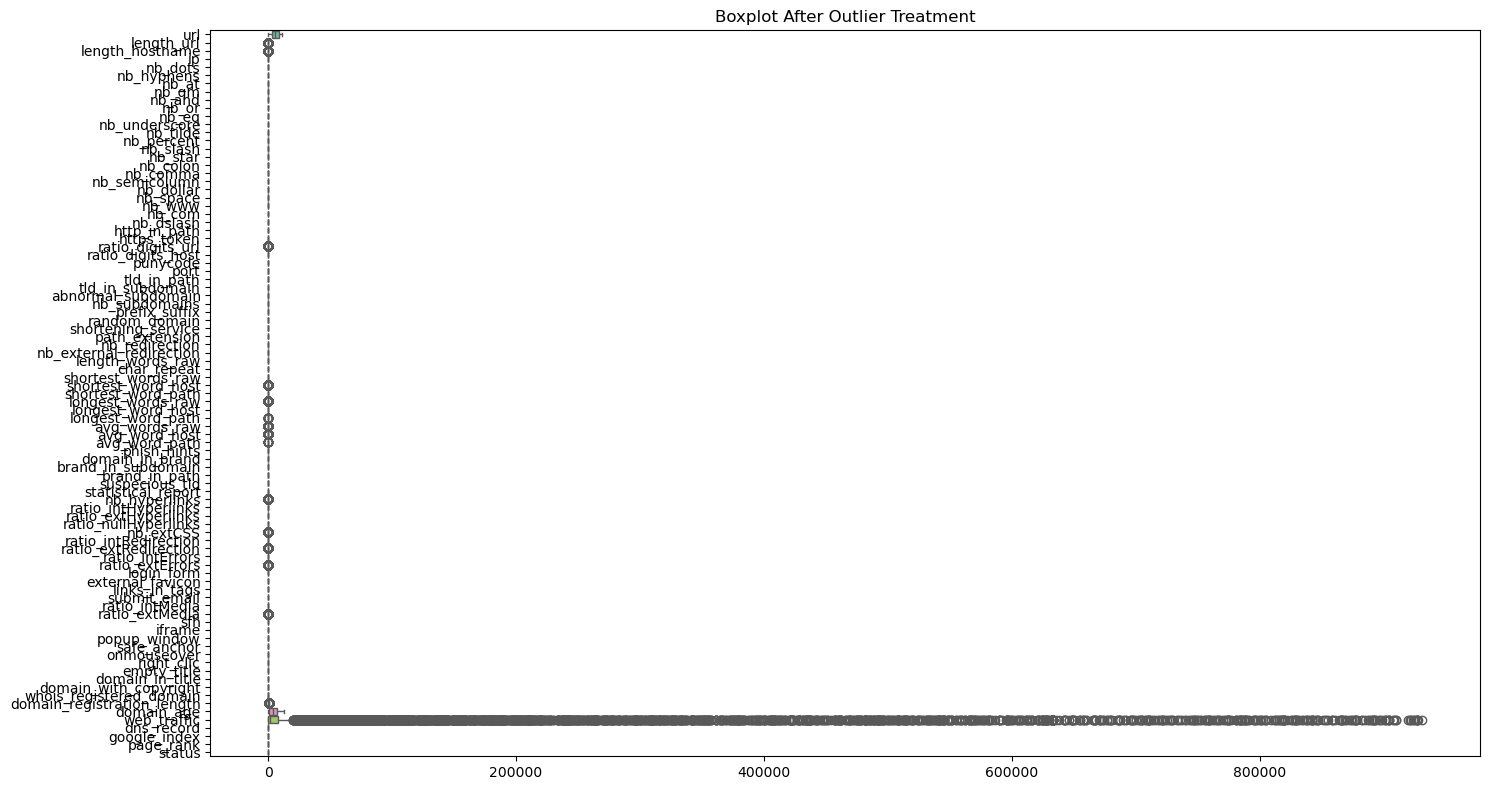

In [66]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplot for all numerical columns
sns.boxplot(data=df, orient='h', palette='Set2')

# Set title
plt.title('Boxplot After Outlier Treatment')
plt.tight_layout()
plt.show()


In [67]:
# Checking VIF:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by = 'VIF_Values', ascending=False)
    return (vif)

calculate_vif(df.drop('status',axis = 1))

,features,VIF_Values
0,url,9.42
25,https_token,7.70
47,longest_word_path,5.86
33,nb_subdomains,5.36
46,longest_word_host,5.18
4,nb_dots,4.88
58,ratio_intHyperlinks,4.49
45,longest_words_raw,4.38
21,nb_www,4.21
50,avg_word_path,4.16


In [68]:
vif = calculate_vif(df.drop('status',axis = 1))
vif[vif['VIF_Values']>10]

,features,VIF_Values


In [69]:
# Using PCA Concept:

# Step 1: Standardize the data
from sklearn.preprocessing import MinMaxScaler,RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(df)

# Step 2: Determine number of components to retain 90% variance

for i in range(1, df.shape[1] + 1):
    pca = PCA(n_components=i)
    pca.fit(X_scaled)
    evr = np.cumsum(pca.explained_variance_ratio_)
    if evr[i - 1] >= 0.90:
        pcs = i
        break

print("Explained Variance Ratio:", evr)
print("Number of components selected:", pcs)

# Step 3: Apply PCA

pca = PCA(n_components=pcs)
pca_data = pca.fit_transform(X_scaled)

# Step 4: Create DataFrame

pca_columns = [f'PC{j+1}' for j in range(pcs)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Step 5: Join Target Column with PCA:

pca_df = pca_df.join(df['status'], how = 'left')
pca_df

Explained Variance Ratio: [0.57046592 0.970943  ]
Number of components selected: 2


,PC1,PC2,status
0,-7.873171,-5.366775,0
1,-6.311023,14.559213,1
2,-7.736537,-5.395951,1
3,5.910682,-2.885161,0
4,-6.772865,-5.403439,0
...,...,...,...
11425,-1.094859,73.295599,0
11426,-7.901367,-5.380939,1
11427,-7.912587,-5.342337,0
11428,-7.664649,-5.369196,0


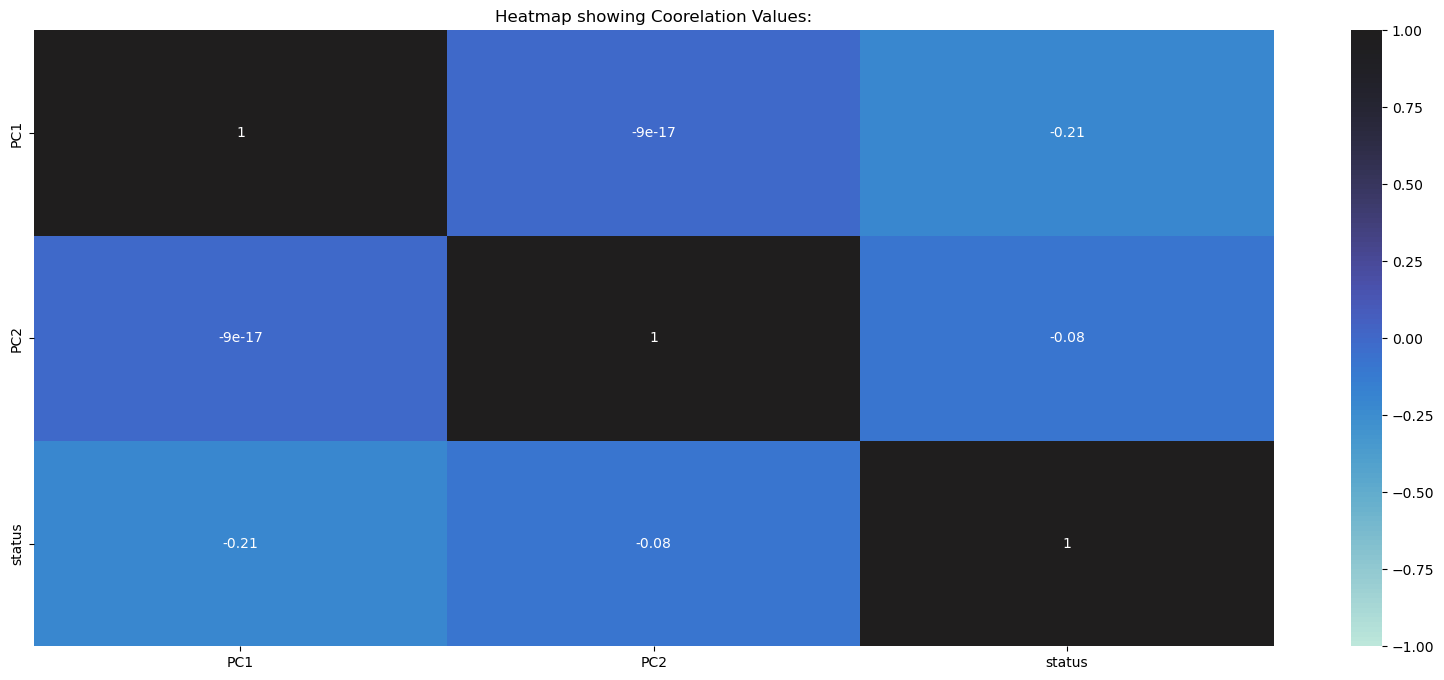

In [70]:
# Checking Correlation 
corr = pca_df.corr()
pca_df.ax = plt.subplots(figsize = (20,8))
sns.heatmap(corr,annot = True,center = True,vmax= 1,vmin = -1)
plt.title('Heatmap showing Coorelation Values:')
plt.show()

In [71]:
# Model Building
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve,KFold
from sklearn.metrics import accuracy_score, classification_report


def train_and_test_split(data, tcol, testSize=0.3, randomState=3):
    X = data.drop(tcol,axis=1)
    y = data[tcol]
    return train_test_split(X,y,test_size = testSize,random_state=randomState)

def model_builder(model_name, model, data, t_col):
    X_train,X_test,y_train,y_test = train_and_test_split(data,t_col)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    result = [model_name, accuracy]
    return result


model_builder(model_name='RandomForestClassifier',model=RandomForestClassifier(),data=pca_df,t_col='status')


['RandomForestClassifier', 0.8457276173811606]

In [72]:
from sklearn.linear_model import SGDClassifier

model_builder(model_name='SGDClassifier',model=SGDClassifier(),data=pca_df,t_col='status')

['SGDClassifier', 0.4689413823272091]

In [73]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

def kfold_model_builder(model_name, model, data, t_col, k=10):
    X = data.drop(t_col, axis=1)
    y = data[t_col]

    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    avg_accuracy = sum(accuracies) / len(accuracies)
    result = [model_name, avg_accuracy]
    return result

In [74]:
from sklearn.ensemble import RandomForestClassifier

result = kfold_model_builder(
    model_name='RandomForestClassifier',
    model=RandomForestClassifier(),
    data=pca_df,
    t_col='status',
    k=10
)

print(result)

['RandomForestClassifier', 0.8503062117235345]
